### Calculate the conditional wet/dry probabilities for each pair of gauges:
### Fisera Ridge, Upper Clearing, Hay Meadow, Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills
### Wet/dry day threshold = 1.0 mm

In [1]:
import numpy as np
import pandas as pd
import math
import scipy as st
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

### Read in P data for all 8 stations from csv file created in P_inputs_2005-2016.ipynb

In [2]:
# Use pd.read_csv to read csv file
allstnsP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\Pinputs_2005-2016.csv",
                         index_col=0)
allstnsP_df.head()

,FR_p_mm,UC_p_mm,KP_p_mm,HM_p_mm,BCS_p_mm,K_p_mm,BV_p_mm,WH_p_mm
date,,,,,,,,
2005-10-01,16.0160,11.3028,16.0,7.3722,11.0,0.0,10.4,0.8
2005-10-02,0.0000,0.0000,0.0,0.0000,0.2,0.4,0.0,0.0
2005-10-03,0.7649,0.5399,0.0,0.0000,0.2,1.2,0.2,4.0
2005-10-04,0.5463,0.3855,0.0,0.0000,0.0,0.0,0.4,0.0
2005-10-05,0.0896,0.0633,1.4,0.0000,0.0,0.0,0.0,0.0


In [3]:
# # round P values to 1 dp for threshold calculations
# allstnsP1dp_df = allstnsP_df.round(1)
# allstnsP1dp_df.head()

### Pair 1: Fisera Ridge (2325 m) and Upper Clearing (1845 m)

In [4]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# FR
FRprobdry = (allstnsP_df.FR_p_mm < 1.0).sum() / len(allstnsP_df)
FRprobwet = 1 - FRprobdry
# UC
UCprobdry = (allstnsP_df.UC_p_mm < 1.0).sum() / len(allstnsP_df)
UCprobwet = 1 - UCprobdry
# print probabilities
print("FRprobdry =", FRprobdry.round(3))
print("FRprobwet =", FRprobwet.round(3))
print("UCprobdry =", UCprobdry.round(3))
print("UCprobwet =", UCprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probFRdry_UCdry = FRprobdry * UCprobdry
probFRdry_UCwet = FRprobdry * UCprobwet
probFRwet_UCdry = FRprobwet * UCprobdry
probFRwet_UCwet = FRprobwet * UCprobwet
# print conditional probabilities
print("probFRdry_UCdry =", probFRdry_UCdry.round(3))
print("probFRdry_UCwet =", probFRdry_UCwet.round(3))
print("probFRwet_UCdry =", probFRwet_UCdry.round(3))
print("probFRwet_UCwet =", probFRwet_UCwet.round(3))

# create a 2x2 array of conditional probabilities
FRUCarr = np.array([[probFRdry_UCdry.round(3),probFRdry_UCwet.round(3)],[probFRwet_UCdry.round(3),probFRwet_UCwet.round(3)]])
FRUCarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\FRUCarr.csv", FRUCarr, delimiter=',')

FRprobdry = 0.631
FRprobwet = 0.369
UCprobdry = 0.719
UCprobwet = 0.281
probFRdry_UCdry = 0.454
probFRdry_UCwet = 0.177
probFRwet_UCdry = 0.265
probFRwet_UCwet = 0.104


### Pair 2: Fisera Ridge (2325 m) & Hay Meadow (1436 m)

In [5]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# FR
FRprobdry = (allstnsP_df.FR_p_mm < 1.0).sum() / len(allstnsP_df)
FRprobwet = 1 - FRprobdry
# HM
HMprobdry = (allstnsP_df.HM_p_mm < 1.0).sum() / len(allstnsP_df)
HMprobwet = 1 - HMprobdry
# print probabilities
print("FRprobdry =", FRprobdry.round(3))
print("FRprobwet =", FRprobwet.round(3))
print("HMprobdry =", HMprobdry.round(3))
print("HMprobwet =", HMprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probFRdry_HMdry = FRprobdry * HMprobdry
probFRdry_HMwet = FRprobdry * HMprobwet
probFRwet_HMdry = FRprobwet * HMprobdry
probFRwet_HMwet = FRprobwet * HMprobwet
# print conditional probabilities
print("probFRdry_HMdry =", probFRdry_HMdry.round(3))
print("probFRdry_HMwet =", probFRdry_HMwet.round(3))
print("probFRwet_HMdry =", probFRwet_HMdry.round(3))
print("probFRwet_HMwet =", probFRwet_HMwet.round(3))

# create a 2x2 array of conditional probabilities
FRHMarr = np.array([[probFRdry_HMdry.round(3),probFRdry_HMwet.round(3)],[probFRwet_HMdry.round(3),probFRwet_HMwet.round(3)]])
FRHMarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\FRHMarr.csv", FRHMarr, delimiter=',')

FRprobdry = 0.631
FRprobwet = 0.369
HMprobdry = 0.772
HMprobwet = 0.228
probFRdry_HMdry = 0.487
probFRdry_HMwet = 0.144
probFRwet_HMdry = 0.285
probFRwet_HMwet = 0.084


### Pair 3: Fisera Ridge (2325 m) & Kananaskis (1391 m)

In [6]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# FR
FRprobdry = (allstnsP_df.FR_p_mm < 1.0).sum() / len(allstnsP_df)
FRprobwet = 1 - FRprobdry
# K
Kprobdry = (allstnsP_df.K_p_mm < 1.0).sum() / len(allstnsP_df)
Kprobwet = 1 - Kprobdry
# print probabilities
print("FRprobdry =", FRprobdry.round(3))
print("FRprobwet =", FRprobwet.round(3))
print("Kprobdry =", Kprobdry.round(3))
print("Kprobwet =", Kprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probFRdry_Kdry = FRprobdry * Kprobdry
probFRdry_Kwet = FRprobdry * Kprobwet
probFRwet_Kdry = FRprobwet * Kprobdry
probFRwet_Kwet = FRprobwet * Kprobwet
# print conditional probabilities
print("probFRdry_Kdry =", probFRdry_Kdry.round(3))
print("probFRdry_Kwet =", probFRdry_Kwet.round(3))
print("probFRwet_Kdry =", probFRwet_Kdry.round(3))
print("probFRwet_Kwet =", probFRwet_Kwet.round(3))

# create a 2x2 array of conditional probabilities
FRKarr = np.array([[probFRdry_Kdry.round(3),probFRdry_Kwet.round(3)],[probFRwet_Kdry.round(3),probFRwet_Kwet.round(3)]])
FRKarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\FRKarr.csv", FRKarr, delimiter=',')

FRprobdry = 0.631
FRprobwet = 0.369
Kprobdry = 0.741
Kprobwet = 0.259
probFRdry_Kdry = 0.468
probFRdry_Kwet = 0.164
probFRwet_Kdry = 0.273
probFRwet_Kwet = 0.096


### Pair 4: Fisera Ridge (2325 m) & Bow Valley (1298 m)

In [7]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# FR
FRprobdry = (allstnsP_df.FR_p_mm < 1.0).sum() / len(allstnsP_df)
FRprobwet = 1 - FRprobdry
# BV
BVprobdry = (allstnsP_df.BV_p_mm < 1.0).sum() / len(allstnsP_df)
BVprobwet = 1 - BVprobdry
# print probabilities
print("FRprobdry =", FRprobdry.round(3))
print("FRprobwet =", FRprobwet.round(3))
print("BVprobdry =", BVprobdry.round(3))
print("BVprobwet =", BVprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probFRdry_BVdry = FRprobdry * BVprobdry
probFRdry_BVwet = FRprobdry * BVprobwet
probFRwet_BVdry = FRprobwet * BVprobdry
probFRwet_BVwet = FRprobwet * BVprobwet
# print conditional probabilities
print("probFRdry_BVdry =", probFRdry_BVdry.round(3))
print("probFRdry_BVwet =", probFRdry_BVwet.round(3))
print("probFRwet_BVdry =", probFRwet_BVdry.round(3))
print("probFRwet_BVwet =", probFRwet_BVwet.round(3))

# create a 2x2 array of conditional probabilities
FRBVarr = np.array([[probFRdry_BVdry.round(3),probFRdry_BVwet.round(3)],[probFRwet_BVdry.round(3),probFRwet_BVwet.round(3)]])
FRBVarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\FRBVarr.csv", FRBVarr, delimiter=',')

FRprobdry = 0.631
FRprobwet = 0.369
BVprobdry = 0.722
BVprobwet = 0.278
probFRdry_BVdry = 0.455
probFRdry_BVwet = 0.176
probFRwet_BVdry = 0.266
probFRwet_BVwet = 0.103


### Pair 5: Fisera Ridge (2325 m) & Kananaskis Pocaterra (1610 m)

In [8]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# FR
FRprobdry = (allstnsP_df.FR_p_mm < 1.0).sum() / len(allstnsP_df)
FRprobwet = 1 - FRprobdry
# KP
KPprobdry = (allstnsP_df.KP_p_mm < 1.0).sum() / len(allstnsP_df)
KPprobwet = 1 - KPprobdry
# print probabilities
print("FRprobdry =", FRprobdry.round(3))
print("FRprobwet =", FRprobwet.round(3))
print("KPprobdry =", KPprobdry.round(3))
print("KPprobwet =", KPprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probFRdry_KPdry = FRprobdry * KPprobdry
probFRdry_KPwet = FRprobdry * KPprobwet
probFRwet_KPdry = FRprobwet * KPprobdry
probFRwet_KPwet = FRprobwet * KPprobwet
# print conditional probabilities
print("probFRdry_KPdry =", probFRdry_KPdry.round(3))
print("probFRdry_KPwet =", probFRdry_KPwet.round(3))
print("probFRwet_KPdry =", probFRwet_KPdry.round(3))
print("probFRwet_KPwet =", probFRwet_KPwet.round(3))

# create a 2x2 array of conditional probabilities
FRKParr = np.array([[probFRdry_KPdry.round(3),probFRdry_KPwet.round(3)],[probFRwet_KPdry.round(3),probFRwet_KPwet.round(3)]])
FRKParr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\FRKParr.csv", FRKParr, delimiter=',')

FRprobdry = 0.631
FRprobwet = 0.369
KPprobdry = 0.424
KPprobwet = 0.576
probFRdry_KPdry = 0.268
probFRdry_KPwet = 0.363
probFRwet_KPdry = 0.157
probFRwet_KPwet = 0.212


### Pair 6: Fisera Ridge (2325 m) & Banff CS (1397 m)

In [9]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# FR
FRprobdry = (allstnsP_df.FR_p_mm < 1.0).sum() / len(allstnsP_df)
FRprobwet = 1 - FRprobdry
# BCS
BCSprobdry = (allstnsP_df.BCS_p_mm < 1.0).sum() / len(allstnsP_df)
BCSprobwet = 1 - BCSprobdry
# print probabilities
print("FRprobdry =", FRprobdry.round(3))
print("FRprobwet =", FRprobwet.round(3))
print("BCSprobdry =", BCSprobdry.round(3))
print("BCSprobwet =", BCSprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probFRdry_BCSdry = FRprobdry * BCSprobdry
probFRdry_BCSwet = FRprobdry * BCSprobwet
probFRwet_BCSdry = FRprobwet * BCSprobdry
probFRwet_BCSwet = FRprobwet * BCSprobwet
# print conditional probabilities
print("probFRdry_BCSdry =", probFRdry_BCSdry.round(3))
print("probFRdry_BCSwet =", probFRdry_BCSwet.round(3))
print("probFRwet_BCSdry =", probFRwet_BCSdry.round(3))
print("probFRwet_BCSwet =", probFRwet_BCSwet.round(3))

# create a 2x2 array of conditional probabilities
FRBCSarr = np.array([[probFRdry_BCSdry.round(3),probFRdry_BCSwet.round(3)],[probFRwet_BCSdry.round(3),probFRwet_BCSwet.round(3)]])
FRBCSarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\FRBCSarr.csv", FRBCSarr, delimiter=',')

FRprobdry = 0.631
FRprobwet = 0.369
BCSprobdry = 0.747
BCSprobwet = 0.253
probFRdry_BCSdry = 0.472
probFRdry_BCSwet = 0.16
probFRwet_BCSdry = 0.275
probFRwet_BCSwet = 0.093


### Pair 7: Fisera Ridge (2325 m) & Wildcat Hills (1268 m)

In [10]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# FR
FRprobdry = (allstnsP_df.FR_p_mm < 1.0).sum() / len(allstnsP_df)
FRprobwet = 1 - FRprobdry
# WH
WHprobdry = (allstnsP_df.WH_p_mm < 1.0).sum() / len(allstnsP_df)
WHprobwet = 1 - WHprobdry
# print probabilities
print("FRprobdry =", FRprobdry.round(3))
print("FRprobwet =", FRprobwet.round(3))
print("WHprobdry =", WHprobdry.round(3))
print("WHprobwet =", WHprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probFRdry_WHdry = FRprobdry * WHprobdry
probFRdry_WHwet = FRprobdry * WHprobwet
probFRwet_WHdry = FRprobwet * WHprobdry
probFRwet_WHwet = FRprobwet * WHprobwet
# print conditional probabilities
print("probFRdry_WHdry =", probFRdry_WHdry.round(3))
print("probFRdry_WHwet =", probFRdry_WHwet.round(3))
print("probFRwet_WHdry =", probFRwet_WHdry.round(3))
print("probFRwet_WHwet =", probFRwet_WHwet.round(3))

# create a 2x2 array of conditional probabilities
FRWHarr = np.array([[probFRdry_WHdry.round(3),probFRdry_WHwet.round(3)],[probFRwet_WHdry.round(3),probFRwet_WHwet.round(3)]])
FRWHarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\FRWHarr.csv", FRWHarr, delimiter=',')

FRprobdry = 0.631
FRprobwet = 0.369
WHprobdry = 0.722
WHprobwet = 0.278
probFRdry_WHdry = 0.456
probFRdry_WHwet = 0.176
probFRwet_WHdry = 0.266
probFRwet_WHwet = 0.103


### Pair 8: Upper Clearing (1845 m) & Hay Meadow (1436 m)

In [11]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# UC
UCprobdry = (allstnsP_df.UC_p_mm < 1.0).sum() / len(allstnsP_df)
UCprobwet = 1 - UCprobdry
# HM
HMprobdry = (allstnsP_df.HM_p_mm < 1.0).sum() / len(allstnsP_df)
HMprobwet = 1 - HMprobdry
# print probabilities
print("UCprobdry =", UCprobdry.round(3))
print("UCprobwet =", UCprobwet.round(3))
print("HMprobdry =", HMprobdry.round(3))
print("HMprobwet =", HMprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probUCdry_HMdry = UCprobdry * HMprobdry
probUCdry_HMwet = UCprobdry * HMprobwet
probUCwet_HMdry = UCprobwet * HMprobdry
probUCwet_HMwet = UCprobwet * HMprobwet
# print conditional probabilities
print("probUCdry_HMdry =", probUCdry_HMdry.round(3))
print("probUCdry_HMwet =", probUCdry_HMwet.round(3))
print("probUCwet_HMdry =", probUCwet_HMdry.round(3))
print("probUCwet_HMwet =", probUCwet_HMwet.round(3))

# create a 2x2 array of conditional probabilities
UCHMarr = np.array([[probUCdry_HMdry.round(3),probUCdry_HMwet.round(3)],[probUCwet_HMdry.round(3),probUCwet_HMwet.round(3)]])
UCHMarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\UCHMarr.csv", UCHMarr, delimiter=',')

UCprobdry = 0.719
UCprobwet = 0.281
HMprobdry = 0.772
HMprobwet = 0.228
probUCdry_HMdry = 0.555
probUCdry_HMwet = 0.164
probUCwet_HMdry = 0.217
probUCwet_HMwet = 0.064


### Pair 9: Upper Clearing (1845 m) & Kananaskis (1391 m)

In [12]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# UC
UCprobdry = (allstnsP_df.UC_p_mm < 1.0).sum() / len(allstnsP_df)
UCprobwet = 1 - UCprobdry
# K
Kprobdry = (allstnsP_df.K_p_mm < 1.0).sum() / len(allstnsP_df)
Kprobwet = 1 - Kprobdry
# print probabilities
print("UCprobdry =", UCprobdry.round(3))
print("UCprobwet =", UCprobwet.round(3))
print("Kprobdry =", Kprobdry.round(3))
print("Kprobwet =", Kprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probUCdry_Kdry = UCprobdry * Kprobdry
probUCdry_Kwet = UCprobdry * Kprobwet
probUCwet_Kdry = UCprobwet * Kprobdry
probUCwet_Kwet = UCprobwet * Kprobwet
# print conditional probabilities
print("probUCdry_Kdry =", probUCdry_Kdry.round(3))
print("probUCdry_Kwet =", probUCdry_Kwet.round(3))
print("probUCwet_Kdry =", probUCwet_Kdry.round(3))
print("probUCwet_Kwet =", probUCwet_Kwet.round(3))

# create a 2x2 array of conditional probabilities
UCKarr = np.array([[probUCdry_Kdry.round(3),probUCdry_Kwet.round(3)],[probUCwet_Kdry.round(3),probUCwet_Kwet.round(3)]])
UCKarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\UCKarr.csv", UCKarr, delimiter=',')

UCprobdry = 0.719
UCprobwet = 0.281
Kprobdry = 0.741
Kprobwet = 0.259
probUCdry_Kdry = 0.533
probUCdry_Kwet = 0.186
probUCwet_Kdry = 0.208
probUCwet_Kwet = 0.073


### Pair 10: Upper Clearing (1845 m) & Bow Valley (1298 m)

In [13]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# UC
UCprobdry = (allstnsP_df.UC_p_mm < 1.0).sum() / len(allstnsP_df)
UCprobwet = 1 - UCprobdry
# BV
BVprobdry = (allstnsP_df.BV_p_mm < 1.0).sum() / len(allstnsP_df)
BVprobwet = 1 - BVprobdry
# print probabilities
print("UCprobdry =", UCprobdry.round(3))
print("UCprobwet =", UCprobwet.round(3))
print("BVprobdry =", BVprobdry.round(3))
print("BVprobwet =", BVprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probUCdry_BVdry = UCprobdry * BVprobdry
probUCdry_BVwet = UCprobdry * BVprobwet
probUCwet_BVdry = UCprobwet * BVprobdry
probUCwet_BVwet = UCprobwet * BVprobwet
# print conditional probabilities
print("probUCdry_BVdry =", probUCdry_BVdry.round(3))
print("probUCdry_BVwet =", probUCdry_BVwet.round(3))
print("probUCwet_BVdry =", probUCwet_BVdry.round(3))
print("probUCwet_BVwet =", probUCwet_BVwet.round(3))

# create a 2x2 array of conditional probabilities
UCBVarr = np.array([[probUCdry_BVdry.round(3),probUCdry_BVwet.round(3)],[probUCwet_BVdry.round(3),probUCwet_BVwet.round(3)]])
UCBVarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\UCBVarr.csv", UCBVarr, delimiter=',')

UCprobdry = 0.719
UCprobwet = 0.281
BVprobdry = 0.722
BVprobwet = 0.278
probUCdry_BVdry = 0.519
probUCdry_BVwet = 0.2
probUCwet_BVdry = 0.203
probUCwet_BVwet = 0.078


### Pair 11: Upper Clearing (1845 m) & Kananaskis Pocaterra (1610 m)

In [14]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# UC
UCprobdry = (allstnsP_df.UC_p_mm < 1.0).sum() / len(allstnsP_df)
UCprobwet = 1 - UCprobdry
# KP
KPprobdry = (allstnsP_df.KP_p_mm < 1.0).sum() / len(allstnsP_df)
KPprobwet = 1 - KPprobdry
# print probabilities
print("UCprobdry =", UCprobdry.round(3))
print("UCprobwet =", UCprobwet.round(3))
print("KPprobdry =", KPprobdry.round(3))
print("KPprobwet =", KPprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probUCdry_KPdry = UCprobdry * KPprobdry
probUCdry_KPwet = UCprobdry * KPprobwet
probUCwet_KPdry = UCprobwet * KPprobdry
probUCwet_KPwet = UCprobwet * KPprobwet
# print conditional probabilities
print("probUCdry_KPdry =", probUCdry_KPdry.round(3))
print("probUCdry_KPwet =", probUCdry_KPwet.round(3))
print("probUCwet_KPdry =", probUCwet_KPdry.round(3))
print("probUCwet_KPwet =", probUCwet_KPwet.round(3))

# create a 2x2 array of conditional probabilities
UCKParr = np.array([[probUCdry_KPdry.round(3),probUCdry_KPwet.round(3)],[probUCwet_KPdry.round(3),probUCwet_KPwet.round(3)]])
UCKParr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\UCKParr.csv", UCKParr, delimiter=',')

UCprobdry = 0.719
UCprobwet = 0.281
KPprobdry = 0.424
KPprobwet = 0.576
probUCdry_KPdry = 0.305
probUCdry_KPwet = 0.414
probUCwet_KPdry = 0.119
probUCwet_KPwet = 0.162


### Pair 12: Upper Clearing (1845 m) & Banff CS (1397 m)

In [15]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# UC
UCprobdry = (allstnsP_df.UC_p_mm < 1.0).sum() / len(allstnsP_df)
UCprobwet = 1 - UCprobdry
# BCS
BCSprobdry = (allstnsP_df.BCS_p_mm < 1.0).sum() / len(allstnsP_df)
BCSprobwet = 1 - BCSprobdry
# print probabilities
print("UCprobdry =", UCprobdry.round(3))
print("UCprobwet =", UCprobwet.round(3))
print("BCSprobdry =", BCSprobdry.round(3))
print("BCSprobwet =", BCSprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probUCdry_BCSdry = UCprobdry * BCSprobdry
probUCdry_BCSwet = UCprobdry * BCSprobwet
probUCwet_BCSdry = UCprobwet * BCSprobdry
probUCwet_BCSwet = UCprobwet * BCSprobwet
# print conditional probabilities
print("probUCdry_BCSdry =", probUCdry_BCSdry.round(3))
print("probUCdry_BCSwet =", probUCdry_BCSwet.round(3))
print("probUCwet_BCSdry =", probUCwet_BCSdry.round(3))
print("probUCwet_BCSwet =", probUCwet_BCSwet.round(3))

# create a 2x2 array of conditional probabilities
UCBCSarr = np.array([[probUCdry_BCSdry.round(3),probUCdry_BCSwet.round(3)],[probUCwet_BCSdry.round(3),probUCwet_BCSwet.round(3)]])
UCBCSarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\UCBCSarr.csv", UCBCSarr, delimiter=',')

UCprobdry = 0.719
UCprobwet = 0.281
BCSprobdry = 0.747
BCSprobwet = 0.253
probUCdry_BCSdry = 0.537
probUCdry_BCSwet = 0.182
probUCwet_BCSdry = 0.21
probUCwet_BCSwet = 0.071


### Pair 13: Upper Clearing (1845 m) & Wildcat Hills (1268 m)

In [16]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# UC
UCprobdry = (allstnsP_df.UC_p_mm < 1.0).sum() / len(allstnsP_df)
UCprobwet = 1 - UCprobdry
# WH
WHprobdry = (allstnsP_df.WH_p_mm < 1.0).sum() / len(allstnsP_df)
WHprobwet = 1 - WHprobdry
# print probabilities
print("UCprobdry =", UCprobdry.round(3))
print("UCprobwet =", UCprobwet.round(3))
print("WHprobdry =", WHprobdry.round(3))
print("WHprobwet =", WHprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probUCdry_WHdry = UCprobdry * WHprobdry
probUCdry_WHwet = UCprobdry * WHprobwet
probUCwet_WHdry = UCprobwet * WHprobdry
probUCwet_WHwet = UCprobwet * WHprobwet
# print conditional probabilities
print("probUCdry_WHdry =", probUCdry_WHdry.round(3))
print("probUCdry_WHwet =", probUCdry_WHwet.round(3))
print("probUCwet_WHdry =", probUCwet_WHdry.round(3))
print("probUCwet_WHwet =", probUCwet_WHwet.round(3))

# create a 2x2 array of conditional probabilities
UCWHarr = np.array([[probUCdry_WHdry.round(3),probUCdry_WHwet.round(3)],[probUCwet_WHdry.round(3),probUCwet_WHwet.round(3)]])
UCWHarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\UCWHarr.csv", UCWHarr, delimiter=',')

UCprobdry = 0.719
UCprobwet = 0.281
WHprobdry = 0.722
WHprobwet = 0.278
probUCdry_WHdry = 0.519
probUCdry_WHwet = 0.2
probUCwet_WHdry = 0.203
probUCwet_WHwet = 0.078


### Pair 14: Hay Meadow (1436 m) & Kananaskis (1391 m)

In [17]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# HM
HMprobdry = (allstnsP_df.HM_p_mm < 1.0).sum() / len(allstnsP_df)
HMprobwet = 1 - HMprobdry
# K
Kprobdry = (allstnsP_df.K_p_mm < 1.0).sum() / len(allstnsP_df)
Kprobwet = 1 - Kprobdry
# print probabilities
print("HMprobdry =", HMprobdry.round(3))
print("HMprobwet =", HMprobwet.round(3))
print("Kprobdry =", Kprobdry.round(3))
print("Kprobwet =", Kprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probHMdry_Kdry = HMprobdry * Kprobdry
probHMdry_Kwet = HMprobdry * Kprobwet
probHMwet_Kdry = HMprobwet * Kprobdry
probHMwet_Kwet = HMprobwet * Kprobwet
# print conditional probabilities
print("probHMdry_Kdry =", probHMdry_Kdry.round(3))
print("probHMdry_Kwet =", probHMdry_Kwet.round(3))
print("probHMwet_Kdry =", probHMwet_Kdry.round(3))
print("probHMwet_Kwet =", probHMwet_Kwet.round(3))

# create a 2x2 array of conditional probabilities
HMKarr = np.array([[probHMdry_Kdry.round(3),probHMdry_Kwet.round(3)],[probHMwet_Kdry.round(3),probHMwet_Kwet.round(3)]])
HMKarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\HMKarr.csv", HMKarr, delimiter=',')

HMprobdry = 0.772
HMprobwet = 0.228
Kprobdry = 0.741
Kprobwet = 0.259
probHMdry_Kdry = 0.572
probHMdry_Kwet = 0.2
probHMwet_Kdry = 0.169
probHMwet_Kwet = 0.059


### Pair 15: Hay Meadow (1436 m) & Bow Valley (1298 m)

In [18]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# HM
HMprobdry = (allstnsP_df.HM_p_mm < 1.0).sum() / len(allstnsP_df)
HMprobwet = 1 - HMprobdry
# BV
BVprobdry = (allstnsP_df.BV_p_mm < 1.0).sum() / len(allstnsP_df)
BVprobwet = 1 - BVprobdry
# print probabilities
print("HMprobdry =", HMprobdry.round(3))
print("HMprobwet =", HMprobwet.round(3))
print("BVprobdry =", BVprobdry.round(3))
print("BVprobwet =", BVprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probHMdry_BVdry = HMprobdry * BVprobdry
probHMdry_BVwet = HMprobdry * BVprobwet
probHMwet_BVdry = HMprobwet * BVprobdry
probHMwet_BVwet = HMprobwet * BVprobwet
# print conditional probabilities
print("probHMdry_BVdry =", probHMdry_BVdry.round(3))
print("probHMdry_BVwet =", probHMdry_BVwet.round(3))
print("probHMwet_BVdry =", probHMwet_BVdry.round(3))
print("probHMwet_BVwet =", probHMwet_BVwet.round(3))

# create a 2x2 array of conditional probabilities
HMBVarr = np.array([[probHMdry_BVdry.round(3),probHMdry_BVwet.round(3)],[probHMwet_BVdry.round(3),probHMwet_BVwet.round(3)]])
HMBVarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\HMBVarr.csv", HMBVarr, delimiter=',')

HMprobdry = 0.772
HMprobwet = 0.228
BVprobdry = 0.722
BVprobwet = 0.278
probHMdry_BVdry = 0.557
probHMdry_BVwet = 0.215
probHMwet_BVdry = 0.164
probHMwet_BVwet = 0.063


### Pair 16: Hay Meadow (1436 m) & Kananaskis Pocaterra (1610 m)

In [19]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# HM
HMprobdry = (allstnsP_df.HM_p_mm < 1.0).sum() / len(allstnsP_df)
HMprobwet = 1 - HMprobdry
# KP
KPprobdry = (allstnsP_df.KP_p_mm < 1.0).sum() / len(allstnsP_df)
KPprobwet = 1 - KPprobdry
# print probabilities
print("HMprobdry =", HMprobdry.round(3))
print("HMprobwet =", HMprobwet.round(3))
print("KPprobdry =", KPprobdry.round(3))
print("KPprobwet =", KPprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probHMdry_KPdry = HMprobdry * KPprobdry
probHMdry_KPwet = HMprobdry * KPprobwet
probHMwet_KPdry = HMprobwet * KPprobdry
probHMwet_KPwet = HMprobwet * KPprobwet
# print conditional probabilities
print("probHMdry_KPdry =", probHMdry_KPdry.round(3))
print("probHMdry_KPwet =", probHMdry_KPwet.round(3))
print("probHMwet_KPdry =", probHMwet_KPdry.round(3))
print("probHMwet_KPwet =", probHMwet_KPwet.round(3))

# create a 2x2 array of conditional probabilities
HMKParr = np.array([[probHMdry_KPdry.round(3),probHMdry_KPwet.round(3)],[probHMwet_KPdry.round(3),probHMwet_KPwet.round(3)]])
HMKParr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\HMKParr.csv", HMKParr, delimiter=',')

HMprobdry = 0.772
HMprobwet = 0.228
KPprobdry = 0.424
KPprobwet = 0.576
probHMdry_KPdry = 0.328
probHMdry_KPwet = 0.444
probHMwet_KPdry = 0.097
probHMwet_KPwet = 0.131


### Pair 17: Hay Meadow (1436 m) & Banff CS (1397 m)

In [20]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# HM
HMprobdry = (allstnsP_df.HM_p_mm < 1.0).sum() / len(allstnsP_df)
HMprobwet = 1 - HMprobdry
# BCS
BCSprobdry = (allstnsP_df.BCS_p_mm < 1.0).sum() / len(allstnsP_df)
BCSprobwet = 1 - BCSprobdry
# print probabilities
print("HMprobdry =", HMprobdry.round(3))
print("HMprobwet =", HMprobwet.round(3))
print("BCSprobdry =", BCSprobdry.round(3))
print("BCSprobwet =", BCSprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probHMdry_BCSdry = HMprobdry * BCSprobdry
probHMdry_BCSwet = HMprobdry * BCSprobwet
probHMwet_BCSdry = HMprobwet * BCSprobdry
probHMwet_BCSwet = HMprobwet * BCSprobwet
# print conditional probabilities
print("probHMdry_BCSdry =", probHMdry_BCSdry.round(3))
print("probHMdry_BCSwet =", probHMdry_BCSwet.round(3))
print("probHMwet_BCSdry =", probHMwet_BCSdry.round(3))
print("probHMwet_BCSwet =", probHMwet_BCSwet.round(3))

# create a 2x2 array of conditional probabilities
HMBCSarr = np.array([[probHMdry_BCSdry.round(3),probHMdry_BCSwet.round(3)],[probHMwet_BCSdry.round(3),probHMwet_BCSwet.round(3)]])
HMBCSarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\HMBCSarr.csv", HMBCSarr, delimiter=',')

HMprobdry = 0.772
HMprobwet = 0.228
BCSprobdry = 0.747
BCSprobwet = 0.253
probHMdry_BCSdry = 0.577
probHMdry_BCSwet = 0.195
probHMwet_BCSdry = 0.17
probHMwet_BCSwet = 0.058


### Pair 18: Hay Meadow (1436 m) & Wildcat Hills (1268 m)

In [21]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# HM
HMprobdry = (allstnsP_df.HM_p_mm < 1.0).sum() / len(allstnsP_df)
HMprobwet = 1 - HMprobdry
# WH
WHprobdry = (allstnsP_df.WH_p_mm < 1.0).sum() / len(allstnsP_df)
WHprobwet = 1 - WHprobdry
# print probabilities
print("HMprobdry =", HMprobdry.round(3))
print("HMprobwet =", HMprobwet.round(3))
print("WHprobdry =", WHprobdry.round(3))
print("WHprobwet =", WHprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probHMdry_WHdry = HMprobdry * WHprobdry
probHMdry_WHwet = HMprobdry * WHprobwet
probHMwet_WHdry = HMprobwet * WHprobdry
probHMwet_WHwet = HMprobwet * WHprobwet
# print conditional probabilities
print("probHMdry_WHdry =", probHMdry_WHdry.round(3))
print("probHMdry_WHwet =", probHMdry_WHwet.round(3))
print("probHMwet_WHdry =", probHMwet_WHdry.round(3))
print("probHMwet_WHwet =", probHMwet_WHwet.round(3))

# create a 2x2 array of conditional probabilities
HMWHarr = np.array([[probHMdry_WHdry.round(3),probHMdry_WHwet.round(3)],[probHMwet_WHdry.round(3),probHMwet_WHwet.round(3)]])
HMWHarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\HMWHarr.csv", HMWHarr, delimiter=',')

HMprobdry = 0.772
HMprobwet = 0.228
WHprobdry = 0.722
WHprobwet = 0.278
probHMdry_WHdry = 0.557
probHMdry_WHwet = 0.215
probHMwet_WHdry = 0.165
probHMwet_WHwet = 0.063


### Pair 19: Kananaskis (1391 m) & Bow Valley (1298 m)

In [22]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# K
Kprobdry = (allstnsP_df.K_p_mm < 1.0).sum() / len(allstnsP_df)
Kprobwet = 1 - Kprobdry
# BV
BVprobdry = (allstnsP_df.BV_p_mm < 1.0).sum() / len(allstnsP_df)
BVprobwet = 1 - BVprobdry
# print probabilities
print("Kprobdry =", Kprobdry.round(3))
print("Kprobwet =", Kprobwet.round(3))
print("BVprobdry =", BVprobdry.round(3))
print("BVprobwet =", BVprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probKdry_BVdry = Kprobdry * BVprobdry
probKdry_BVwet = Kprobdry * BVprobwet
probKwet_BVdry = Kprobwet * BVprobdry
probKwet_BVwet = Kprobwet * BVprobwet
# print conditional probabilities
print("probKdry_BVdry =", probKdry_BVdry.round(3))
print("probKdry_BVwet =", probKdry_BVwet.round(3))
print("probKwet_BVdry =", probKwet_BVdry.round(3))
print("probKwet_BVwet =", probKwet_BVwet.round(3))

# create a 2x2 array of conditional probabilities
KBVarr = np.array([[probKdry_BVdry.round(3),probKdry_BVwet.round(3)],[probKwet_BVdry.round(3),probKwet_BVwet.round(3)]])
KBVarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\KBVarr.csv", KBVarr, delimiter=',')

Kprobdry = 0.741
Kprobwet = 0.259
BVprobdry = 0.722
BVprobwet = 0.278
probKdry_BVdry = 0.535
probKdry_BVwet = 0.206
probKwet_BVdry = 0.187
probKwet_BVwet = 0.072


### Pair 20: Kananaskis (1391 m) & Kananaskis Pocaterra (1610 m)

In [23]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# K
Kprobdry = (allstnsP_df.K_p_mm < 1.0).sum() / len(allstnsP_df)
Kprobwet = 1 - Kprobdry
# KP
KPprobdry = (allstnsP_df.KP_p_mm < 1.0).sum() / len(allstnsP_df)
KPprobwet = 1 - KPprobdry
# print probabilities
print("Kprobdry =", Kprobdry.round(3))
print("Kprobwet =", Kprobwet.round(3))
print("KPprobdry =", KPprobdry.round(3))
print("KPprobwet =", KPprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probKdry_KPdry = Kprobdry * KPprobdry
probKdry_KPwet = Kprobdry * KPprobwet
probKwet_KPdry = Kprobwet * KPprobdry
probKwet_KPwet = Kprobwet * KPprobwet
# print conditional probabilities
print("probKdry_KPdry =", probKdry_KPdry.round(3))
print("probKdry_KPwet =", probKdry_KPwet.round(3))
print("probKwet_KPdry =", probKwet_KPdry.round(3))
print("probKwet_KPwet =", probKwet_KPwet.round(3))

# create a 2x2 array of conditional probabilities
KKParr = np.array([[probKdry_KPdry.round(3),probKdry_KPwet.round(3)],[probKwet_KPdry.round(3),probKwet_KPwet.round(3)]])
KKParr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\KKParr.csv", KKParr, delimiter=',')

Kprobdry = 0.741
Kprobwet = 0.259
KPprobdry = 0.424
KPprobwet = 0.576
probKdry_KPdry = 0.315
probKdry_KPwet = 0.426
probKwet_KPdry = 0.11
probKwet_KPwet = 0.149


### Pair 21: Kananaskis (1391 m) & Banff CS (1397 m)

In [24]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# K
Kprobdry = (allstnsP_df.K_p_mm < 1.0).sum() / len(allstnsP_df)
Kprobwet = 1 - Kprobdry
# BCS
BCSprobdry = (allstnsP_df.BCS_p_mm < 1.0).sum() / len(allstnsP_df)
BCSprobwet = 1 - BCSprobdry
# print probabilities
print("Kprobdry =", Kprobdry.round(3))
print("Kprobwet =", Kprobwet.round(3))
print("BCSprobdry =", BCSprobdry.round(3))
print("BCSprobwet =", BCSprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probKdry_BCSdry = Kprobdry * BCSprobdry
probKdry_BCSwet = Kprobdry * BCSprobwet
probKwet_BCSdry = Kprobwet * BCSprobdry
probKwet_BCSwet = Kprobwet * BCSprobwet
# print conditional probabilities
print("probKdry_BCSdry =", probKdry_BCSdry.round(3))
print("probKdry_BCSwet =", probKdry_BCSwet.round(3))
print("probKwet_BCSdry =", probKwet_BCSdry.round(3))
print("probKwet_BCSwet =", probKwet_BCSwet.round(3))

# create a 2x2 array of conditional probabilities
KBCSarr = np.array([[probKdry_BCSdry.round(3),probKdry_BCSwet.round(3)],[probKwet_BCSdry.round(3),probKwet_BCSwet.round(3)]])
KBCSarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\KBCSarr.csv", KBCSarr, delimiter=',')

Kprobdry = 0.741
Kprobwet = 0.259
BCSprobdry = 0.747
BCSprobwet = 0.253
probKdry_BCSdry = 0.553
probKdry_BCSwet = 0.188
probKwet_BCSdry = 0.193
probKwet_BCSwet = 0.066


### Pair 22: Kananaskis (1391 m) & Wildcat Hills (1268 m)

In [25]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# K
Kprobdry = (allstnsP_df.K_p_mm < 1.0).sum() / len(allstnsP_df)
Kprobwet = 1 - Kprobdry
# WH
WHprobdry = (allstnsP_df.WH_p_mm < 1.0).sum() / len(allstnsP_df)
WHprobwet = 1 - WHprobdry
# print probabilities
print("Kprobdry =", Kprobdry.round(3))
print("Kprobwet =", Kprobwet.round(3))
print("WHprobdry =", WHprobdry.round(3))
print("WHprobwet =", WHprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probKdry_WHdry = Kprobdry * WHprobdry
probKdry_WHwet = Kprobdry * WHprobwet
probKwet_WHdry = Kprobwet * WHprobdry
probKwet_WHwet = Kprobwet * WHprobwet
# print conditional probabilities
print("probKdry_WHdry =", probKdry_WHdry.round(3))
print("probKdry_WHwet =", probKdry_WHwet.round(3))
print("probKwet_WHdry =", probKwet_WHdry.round(3))
print("probKwet_WHwet =", probKwet_WHwet.round(3))

# create a 2x2 array of conditional probabilities
KWHarr = np.array([[probKdry_WHdry.round(3),probKdry_WHwet.round(3)],[probKwet_WHdry.round(3),probKwet_WHwet.round(3)]])
KWHarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\KWHarr.csv", KWHarr, delimiter=',')

Kprobdry = 0.741
Kprobwet = 0.259
WHprobdry = 0.722
WHprobwet = 0.278
probKdry_WHdry = 0.535
probKdry_WHwet = 0.206
probKwet_WHdry = 0.187
probKwet_WHwet = 0.072


### Pair 23: Bow Valley (1298 m) & Kananaskis Pocaterra (1610 m)

In [26]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# BV
BVprobdry = (allstnsP_df.BV_p_mm < 1.0).sum() / len(allstnsP_df)
BVprobwet = 1 - BVprobdry
# KP
KPprobdry = (allstnsP_df.KP_p_mm < 1.0).sum() / len(allstnsP_df)
KPprobwet = 1 - KPprobdry
# print probabilities
print("BVprobdry =", BVprobdry.round(3))
print("BVprobwet =", BVprobwet.round(3))
print("KPprobdry =", KPprobdry.round(3))
print("KPprobwet =", KPprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probBVdry_KPdry = BVprobdry * KPprobdry
probBVdry_KPwet = BVprobdry * KPprobwet
probBVwet_KPdry = BVprobwet * KPprobdry
probBVwet_KPwet = BVprobwet * KPprobwet
# print conditional probabilities
print("probBVdry_KPdry =", probBVdry_KPdry.round(3))
print("probBVdry_KPwet =", probBVdry_KPwet.round(3))
print("probBVwet_KPdry =", probBVwet_KPdry.round(3))
print("probBVwet_KPwet =", probBVwet_KPwet.round(3))

# create a 2x2 array of conditional probabilities
BVKParr = np.array([[probBVdry_KPdry.round(3),probBVdry_KPwet.round(3)],[probBVwet_KPdry.round(3),probBVwet_KPwet.round(3)]])
BVKParr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\BVKParr.csv", BVKParr, delimiter=',')

BVprobdry = 0.722
BVprobwet = 0.278
KPprobdry = 0.424
KPprobwet = 0.576
probBVdry_KPdry = 0.306
probBVdry_KPwet = 0.415
probBVwet_KPdry = 0.118
probBVwet_KPwet = 0.16


### Pair 24: Bow Valley (1298 m) & Banff CS (1397 m)

In [27]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# BV
BVprobdry = (allstnsP_df.BV_p_mm < 1.0).sum() / len(allstnsP_df)
BVprobwet = 1 - BVprobdry
# BCS
BCSprobdry = (allstnsP_df.BCS_p_mm < 1.0).sum() / len(allstnsP_df)
BCSprobwet = 1 - BCSprobdry
# print probabilities
print("BVprobdry =", BVprobdry.round(3))
print("BVprobwet =", BVprobwet.round(3))
print("BCSprobdry =", BCSprobdry.round(3))
print("BCSprobwet =", BCSprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probBVdry_BCSdry = BVprobdry * BCSprobdry
probBVdry_BCSwet = BVprobdry * BCSprobwet
probBVwet_BCSdry = BVprobwet * BCSprobdry
probBVwet_BCSwet = BVprobwet * BCSprobwet
# print conditional probabilities
print("probBVdry_BCSdry =", probBVdry_BCSdry.round(3))
print("probBVdry_BCSwet =", probBVdry_BCSwet.round(3))
print("probBVwet_BCSdry =", probBVwet_BCSdry.round(3))
print("probBVwet_BCSwet =", probBVwet_BCSwet.round(3))

# create a 2x2 array of conditional probabilities
BVBCSarr = np.array([[probBVdry_BCSdry.round(3),probBVdry_BCSwet.round(3)],[probBVwet_BCSdry.round(3),probBVwet_BCSwet.round(3)]])
BVBCSarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\BVBCSarr.csv", BVBCSarr, delimiter=',')

BVprobdry = 0.722
BVprobwet = 0.278
BCSprobdry = 0.747
BCSprobwet = 0.253
probBVdry_BCSdry = 0.539
probBVdry_BCSwet = 0.183
probBVwet_BCSdry = 0.208
probBVwet_BCSwet = 0.07


### Pair 25: Bow Valley (1298 m) & Wildcat Hills (1268 m)

In [28]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# BV
BVprobdry = (allstnsP_df.BV_p_mm < 1.0).sum() / len(allstnsP_df)
BVprobwet = 1 - BVprobdry
# WH
WHprobdry = (allstnsP_df.WH_p_mm < 1.0).sum() / len(allstnsP_df)
WHprobwet = 1 - WHprobdry
# print probabilities
print("BVprobdry =", BVprobdry.round(3))
print("BVprobwet =", BVprobwet.round(3))
print("WHprobdry =", WHprobdry.round(3))
print("WHprobwet =", WHprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probBVdry_WHdry = BVprobdry * WHprobdry
probBVdry_WHwet = BVprobdry * WHprobwet
probBVwet_WHdry = BVprobwet * WHprobdry
probBVwet_WHwet = BVprobwet * WHprobwet
# print conditional probabilities
print("probBVdry_WHdry =", probBVdry_WHdry.round(3))
print("probBVdry_WHwet =", probBVdry_WHwet.round(3))
print("probBVwet_WHdry =", probBVwet_WHdry.round(3))
print("probBVwet_WHwet =", probBVwet_WHwet.round(3))

# create a 2x2 array of conditional probabilities
BVWHarr = np.array([[probBVdry_WHdry.round(3),probBVdry_WHwet.round(3)],[probBVwet_WHdry.round(3),probBVwet_WHwet.round(3)]])
BVWHarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\BVWHarr.csv", BVWHarr, delimiter=',')

BVprobdry = 0.722
BVprobwet = 0.278
WHprobdry = 0.722
WHprobwet = 0.278
probBVdry_WHdry = 0.521
probBVdry_WHwet = 0.201
probBVwet_WHdry = 0.201
probBVwet_WHwet = 0.077


### Pair 26: Kananaskis Pocaterra (1610 m) & Banff CS (1397 m)

In [29]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# KP
KPprobdry = (allstnsP_df.KP_p_mm < 1.0).sum() / len(allstnsP_df)
KPprobwet = 1 - KPprobdry
# BCS
BCSprobdry = (allstnsP_df.BCS_p_mm < 1.0).sum() / len(allstnsP_df)
BCSprobwet = 1 - BCSprobdry
# print probabilities
print("KPprobdry =", KPprobdry.round(3))
print("KPprobwet =", KPprobwet.round(3))
print("BCSprobdry =", BCSprobdry.round(3))
print("BCSprobwet =", BCSprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probKPdry_BCSdry = KPprobdry * BCSprobdry
probKPdry_BCSwet = KPprobdry * BCSprobwet
probKPwet_BCSdry = KPprobwet * BCSprobdry
probKPwet_BCSwet = KPprobwet * BCSprobwet
# print conditional probabilities
print("probKPdry_BCSdry =", probKPdry_BCSdry.round(3))
print("probKPdry_BCSwet =", probKPdry_BCSwet.round(3))
print("probKPwet_BCSdry =", probKPwet_BCSdry.round(3))
print("probKPwet_BCSwet =", probKPwet_BCSwet.round(3))

# create a 2x2 array of conditional probabilities
KPBCSarr = np.array([[probKPdry_BCSdry.round(3),probKPdry_BCSwet.round(3)],[probKPwet_BCSdry.round(3),probKPwet_BCSwet.round(3)]])
KPBCSarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\KPBCSarr.csv", KPBCSarr, delimiter=',')

KPprobdry = 0.424
KPprobwet = 0.576
BCSprobdry = 0.747
BCSprobwet = 0.253
probKPdry_BCSdry = 0.317
probKPdry_BCSwet = 0.107
probKPwet_BCSdry = 0.43
probKPwet_BCSwet = 0.146


### Pair 27: Kananskis Pocaterra (1610 m) & Wildcat Hills (1268 m)

In [30]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# KP
KPprobdry = (allstnsP_df.KP_p_mm < 1.0).sum() / len(allstnsP_df)
KPprobwet = 1 - KPprobdry
# WH
WHprobdry = (allstnsP_df.WH_p_mm < 1.0).sum() / len(allstnsP_df)
WHprobwet = 1 - WHprobdry
# print probabilities
print("KPprobdry =", KPprobdry.round(3))
print("KPprobwet =", KPprobwet.round(3))
print("WHprobdry =", WHprobdry.round(3))
print("WHprobwet =", WHprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probKPdry_WHdry = KPprobdry * WHprobdry
probKPdry_WHwet = KPprobdry * WHprobwet
probKPwet_WHdry = KPprobwet * WHprobdry
probKPwet_WHwet = KPprobwet * WHprobwet
# print conditional probabilities
print("probKPdry_WHdry =", probKPdry_WHdry.round(3))
print("probKPdry_WHwet =", probKPdry_WHwet.round(3))
print("probKPwet_WHdry =", probKPwet_WHdry.round(3))
print("probKPwet_WHwet =", probKPwet_WHwet.round(3))

# create a 2x2 array of conditional probabilities
KPWHarr = np.array([[probKPdry_WHdry.round(3),probKPdry_WHwet.round(3)],[probKPwet_WHdry.round(3),probKPwet_WHwet.round(3)]])
KPWHarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\KPWHarr.csv", KPWHarr, delimiter=',')

KPprobdry = 0.424
KPprobwet = 0.576
WHprobdry = 0.722
WHprobwet = 0.278
probKPdry_WHdry = 0.306
probKPdry_WHwet = 0.118
probKPwet_WHdry = 0.415
probKPwet_WHwet = 0.16


### Pair 28: Banff CS (1397 m) & Wildcat Hills (1268 m)

In [31]:
# Step 1
# in general, probability of dry day = no of days with < 1.0mm of rain divided by the total number of days
# and the probability of a wet day is 1 - the probability of a dry day!

# BCS
BCSprobdry = (allstnsP_df.BCS_p_mm < 1.0).sum() / len(allstnsP_df)
BCSprobwet = 1 - BCSprobdry
# WH
WHprobdry = (allstnsP_df.WH_p_mm < 1.0).sum() / len(allstnsP_df)
WHprobwet = 1 - WHprobdry
# print probabilities
print("BCSprobdry =", BCSprobdry.round(3))
print("BCSprobwet =", BCSprobwet.round(3))
print("WHprobdry =", WHprobdry.round(3))
print("WHprobwet =", WHprobwet.round(3))

# Step 2
# now calculate conditional probabilities
probBCSdry_WHdry = BCSprobdry * WHprobdry
probBCSdry_WHwet = BCSprobdry * WHprobwet
probBCSwet_WHdry = BCSprobwet * WHprobdry
probBCSwet_WHwet = BCSprobwet * WHprobwet
# print conditional probabilities
print("probBCSdry_WHdry =", probBCSdry_WHdry.round(3))
print("probBCSdry_WHwet =", probBCSdry_WHwet.round(3))
print("probBCSwet_WHdry =", probBCSwet_WHdry.round(3))
print("probBCSwet_WHwet =", probBCSwet_WHwet.round(3))

# create a 2x2 array of conditional probabilities
BCSWHarr = np.array([[probBCSdry_WHdry.round(3),probBCSdry_WHwet.round(3)],[probBCSwet_WHdry.round(3),probBCSwet_WHwet.round(3)]])
BCSWHarr
# write array to csv
np.savetxt(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\cond_wet_dry_prob_arrays\BCSWHarr.csv", BCSWHarr, delimiter=',')

BCSprobdry = 0.747
BCSprobwet = 0.253
WHprobdry = 0.722
WHprobwet = 0.278
probBCSdry_WHdry = 0.539
probBCSdry_WHwet = 0.208
probBCSwet_WHdry = 0.183
probBCSwet_WHwet = 0.07


### Focus on stations with separation distance <= 20000 m: FR, UC, HM, K, BV

In [32]:
# FRUC 2020 m
FRUCarr

array([[0.454, 0.177],
       [0.265, 0.104]])

In [33]:
# UCHM 2910 m
UCHMarr

array([[0.555, 0.164],
       [0.217, 0.064]])

In [34]:
# FRHM = 4770 m
FRHMarr

array([[0.487, 0.144],
       [0.285, 0.084]])

In [35]:
# KBV 6600 m
KBVarr

array([[0.535, 0.206],
       [0.187, 0.072]])

In [36]:
# UCK 12650 m
UCKarr

array([[0.533, 0.186],
       [0.208, 0.073]])

In [37]:
# UCBV 16040 m
UCBVarr

array([[0.519, 0.2  ],
       [0.203, 0.078]])

In [38]:
# HMBV 16300 m
HMBVarr

array([[0.557, 0.215],
       [0.164, 0.063]])

In [39]:
# FRBV 17140 m
FRBVarr

array([[0.455, 0.176],
       [0.266, 0.103]])

### Create a df of cond wet dry probabilities for these stations

In [40]:
# step 1: initialise my lists
probs = [["FRUC", 2020, probFRdry_UCdry.round(3), probFRdry_UCwet.round(3), 
          probFRwet_UCdry.round(3), probFRwet_UCwet.round(3)],
         ["UCHM", 2910, probUCdry_HMdry.round(3), probUCdry_HMwet.round(3), 
          probUCwet_HMdry.round(3), probUCwet_HMwet.round(3)],
         ["FRHM", 4770, probFRdry_HMdry.round(3), probFRdry_HMwet.round(3), 
          probFRwet_HMdry.round(3), probFRwet_HMwet.round(3)],
         ["KBV", 6600, probKdry_BVdry.round(3), probKdry_BVwet.round(3), 
          probKwet_BVdry.round(3), probKwet_BVwet.round(3)],
         ["UCK", 12650, probUCdry_Kdry.round(3), probUCdry_Kwet.round(3), 
          probUCwet_Kdry.round(3), probUCwet_Kwet.round(3)],
         ["UCBV", 16040, probUCdry_BVdry.round(3), probUCdry_BVwet.round(3), 
          probUCwet_BVdry.round(3), probUCwet_BVwet.round(3)],
         ["HMBV", 16300, probHMdry_BVdry.round(3), probHMdry_BVwet.round(3), 
          probHMwet_BVdry.round(3), probHMwet_BVwet.round(3)],
         ["FRBV", 17140, probFRdry_BVdry.round(3), probFRdry_BVwet.round(3), 
          probFRwet_BVdry.round(3), probFRwet_BVwet.round(3)]]
probs

[['FRUC', 2020, 0.454, 0.177, 0.265, 0.104],
 ['UCHM', 2910, 0.555, 0.164, 0.217, 0.064],
 ['FRHM', 4770, 0.487, 0.144, 0.285, 0.084],
 ['KBV', 6600, 0.535, 0.206, 0.187, 0.072],
 ['UCK', 12650, 0.533, 0.186, 0.208, 0.073],
 ['UCBV', 16040, 0.519, 0.2, 0.203, 0.078],
 ['HMBV', 16300, 0.557, 0.215, 0.164, 0.063],
 ['FRBV', 17140, 0.455, 0.176, 0.266, 0.103]]

In [41]:
# step 2: create df from lists
probs_df = pd.DataFrame(probs, columns = ["station_pair", "separation_distance_m", "prob_dry-dry", "prob_dry-wet",
                                          "prob_wet-dry", "prob_wet-wet"])
# probs_df.set_index("station_pair", inplace=True)
probs_df

,station_pair,separation_distance_m,prob_dry-dry,prob_dry-wet,prob_wet-dry,prob_wet-wet
0,FRUC,2020,0.454,0.177,0.265,0.104
1,UCHM,2910,0.555,0.164,0.217,0.064
2,FRHM,4770,0.487,0.144,0.285,0.084
3,KBV,6600,0.535,0.206,0.187,0.072
4,UCK,12650,0.533,0.186,0.208,0.073
5,UCBV,16040,0.519,0.200,0.203,0.078
6,HMBV,16300,0.557,0.215,0.164,0.063
7,FRBV,17140,0.455,0.176,0.266,0.103


In [42]:
probs_df.describe().round(3)

,separation_distance_m,prob_dry-dry,prob_dry-wet,prob_wet-dry,prob_wet-wet
count,8.000,8.000,8.000,8.000,8.000
mean,9803.750,0.512,0.184,0.224,0.080
std,6400.078,0.042,0.023,0.043,0.016
min,2020.000,0.454,0.144,0.164,0.063
25%,4305.000,0.479,0.173,0.199,0.070
50%,9625.000,0.526,0.182,0.212,0.076
75%,16105.000,0.540,0.202,0.265,0.089
max,17140.000,0.557,0.215,0.285,0.104


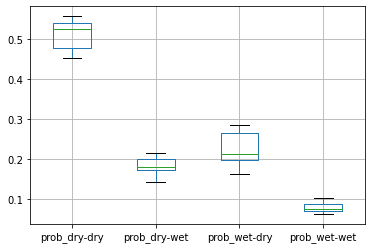

In [54]:
boxplot = probs_df.boxplot(column=['prob_dry-dry', 'prob_dry-wet', 'prob_wet-dry', 'prob_wet-wet'])